# Exercise 6.4 - Supervised Machine Learning: Regression

## This script contains the following:

### 1. Importing libraries, paths and data
### 2. Cleaning Data
### 3. Data Prep for regression
### 4. Regression Analysis
### 5. Results

### -

## 1. Import libraries, paths and data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Ensure graphs are plotted without calling them specifically
%matplotlib inline

In [5]:
#Create path
path = r'/Users/puneet/Desktop/Chocolate Bar Analysis 09-2025'

In [6]:
#Import cleaned data from prior tasks
df = pd.read_csv(os.path.join(path, '02-Data', 'Prepared Data Files', 'flavors_of_cacao_cleaned_v3.csv'), index_col = 0)

### -

## 2. Cleaning Data

In [7]:
#Check data
df.head()

,Company,Bar_Name,Reference_Number,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Country,Flavor_Rating
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,São Tomé and Príncipe,Praiseworthy
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo,Satisfactory
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo,Satisfactory
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo,Satisfactory
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru,Satisfactory


In [9]:
#Check shape
df.shape

(1795, 10)

In [11]:
#Create subset to check duplicates
df_dups = df.duplicated()

#Check for duplicates
df_dups.shape

(1795,)

- No duplicates

In [12]:
#Check nulls
df.isnull().sum()

Company             0
Bar_Name            0
Reference_Number    0
Review_Date         0
Cocoa_Percentage    0
Company_Location    0
Rating              0
Bean_Type           0
Country             0
Flavor_Rating       0
dtype: int64

- No nulls

In [19]:
#Check for extreme values for 'Ratings'

print('Ratings Max:', df['Rating'].max())
print('Ratings Min:', df['Rating'].min())
print('Ratings Median:', df['Rating'].median())
print('Ratings Mean:', df['Rating'].mean().round(2))

Ratings Max: 5.0
Ratings Min: 1.0
Ratings Median: 3.25
Ratings Mean: 3.19


- Statistics look in order, no extreme values

In [20]:
#Check for extreme values of 'Cocoa_Percentage'

print('Cocoa Percentage Max:', df['Cocoa_Percentage'].max())
print('Cocoa Percentage Min:', df['Cocoa_Percentage'].min())
print('Cocoa Percentage Median:', df['Cocoa_Percentage'].median())
print('Cocoa Percentage Mean:', df['Cocoa_Percentage'].mean().round(2))

Cocoa Percentage Max: 100.0
Cocoa Percentage Min: 42.0
Cocoa Percentage Median: 70.0
Cocoa Percentage Mean: 71.7


- Statistics look in order, no extreme values

<Axes: xlabel='Rating', ylabel='Count'>

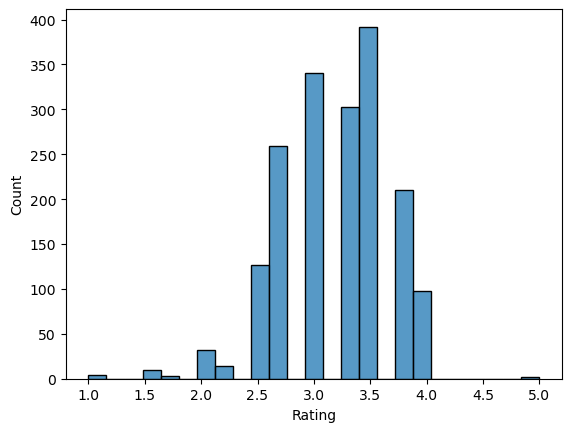

In [24]:
#Plot Ratings for quick visual check
sns.histplot(df['Rating'], bins = 25)

- Plot distribution looks good

<Axes: xlabel='Cocoa_Percentage', ylabel='Count'>

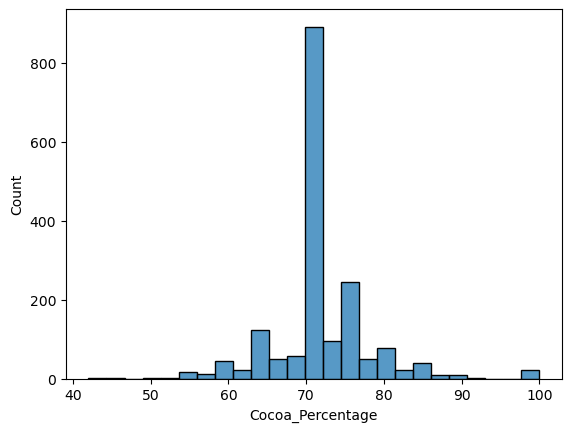

In [25]:
#Plot Cocoa Percentages for quick visual check
sns.histplot(df['Cocoa_Percentage'], bins = 25)

- Plot distribution looks good

### - 

## 3. Data Prep for Regression Analysis

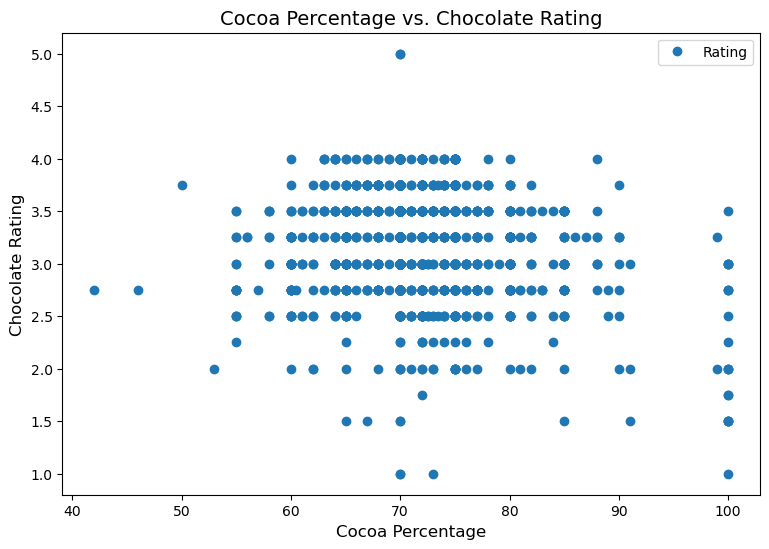

In [26]:
# Create a scatterplot using matplotlib to show variables against each other
df.plot(x='Cocoa_Percentage', y='Rating', style='o', figsize=(9,6))     #Style of  'o' creates a scatterplot

#Titles and Labels
plt.title('Cocoa Percentage vs. Chocolate Rating', fontsize=14)
plt.xlabel('Cocoa Percentage', fontsize=12)
plt.ylabel('Chocolate Rating', fontsize=12)

#Show plot
plt.show()

### Hypothesis we want to test: The highger the cocoa percentage, the lower the chocolate rating will be

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Cocoa_Percentage'].values.reshape(-1,1)   #Independent Variable (Cocoa Percentage)
y = df['Rating'].values.reshape(-1,1)             #Dependent Variable (Rating)

In [29]:
#Check Independent Variable
X

array([[63.],
       [70.],
       [70.],
       ...,
       [65.],
       [62.],
       [65.]], shape=(1795, 1))

In [30]:
#Check Dependent Variable
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]], shape=(1795, 1))

In [31]:
#Split the data into 2 sets: A training set, and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Test 30 percent of the data, and training set is 70 percent of data

- Data is ready for regression analysis

### -

## 4. Regression Analysis

In [32]:
#Create a regression object

regression = LinearRegression()     #This is the regression object that will be fit onto the training set

In [33]:
#Fit regression object onto training set

regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
#Predict the values of y using X

y_predicted = regression.predict(X_test)

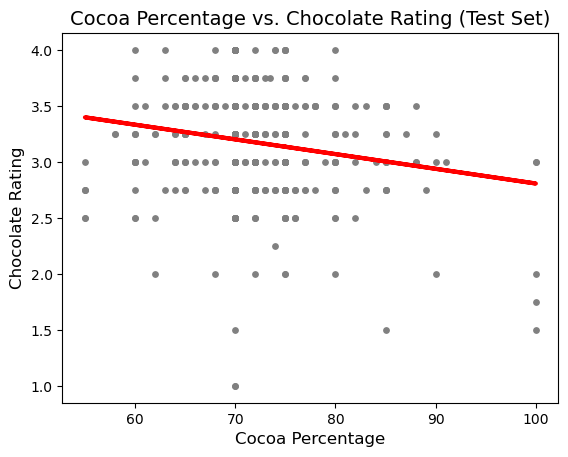

In [37]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)

#Titles and Labels
plot_test.title('Cocoa Percentage vs. Chocolate Rating (Test Set)', fontsize=14)
plot_test.xlabel('Cocoa Percentage', fontsize=12)
plot_test.ylabel('Chocolate Rating', fontsize=12)

#Save Image
plot_test.savefig(os.path.join(path, '04-Analysis', 'Data Visualizations', 'scatterplot_test_set.png'),
                  dpi=300,
                  bbox_inches='tight'
                 )

#Display plot
plot_test.show()

- The downward slope indicates a negative linear relationship between cocoa percentage and ratings, however there are many data points shown that are not close to the line, meaning that the relationship is very weak (not a strong enough predictor)

In [38]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error (y_test, y_predicted) #This is the root mean squared error
r2 = r2_score(y_test, y_predicted)              #THis is the R2 score

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model

print('Slope:', regression.coef_)
print('Mean Squared Error:', rmse)
print('R2 Score:', r2)

Slope: [[-0.01313255]]
Mean Squared Error: 0.20953513101526208
R2 Score: 0.018110020461675203


### Results:
- The slope of -.013 does confirm the negative relationship, meaning if cocoa percentage increases, the rating will decrease at a degree of 0.013
- The Root Mean Squared Error shows .21, which seems small but ratings range from 1-5, which indicates noticable differences between predicted and actual values
- However the R2 score shows us only .018 (1.8%), which means there is a very weak relationship and that the model is not a great fit

In [41]:
# Create a dataframe comparing the actual and predicted values of y

data2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

#Show dataframe and compare values
data2.head(20)

,Actual,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


#### Compare how the regression fits the training set

In [43]:
#Predict

y_predicted_train = regression.predict(X_train) #This is predicting the X_train

In [44]:
rmse_2 = mean_squared_error(y_train, y_predicted_train)
r2_2 = r2_score(y_train, y_predicted_train)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[-0.01313255]]
Mean squared error:  0.22774918296663343
R2 score:  0.02978424922646028


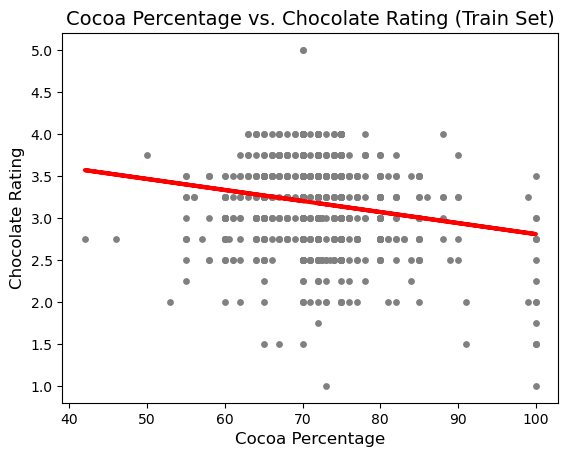

In [46]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s=15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth=3)

#Titles and Labels
plot_test.title('Cocoa Percentage vs. Chocolate Rating (Train Set)', fontsize=14)
plot_test.xlabel('Cocoa Percentage', fontsize=12)
plot_test.ylabel('Chocolate Rating', fontsize=12)

#Save Image
plot_test.savefig(os.path.join(path, '04-Analysis', 'Data Visualizations', 'scatterplot_train_set.png'),
                  dpi=300,
                  bbox_inches='tight'
                 )

#Display plot
plot_test.show()

### -

## 5. Model Performance/Results/Bias
- The model does confirm the negative relationship between cocoa percentage and ratings, but with a low R2 score, the percentage alone isn't the best indicator/predictor
- The rmse scores does predict close to the actual ratings, the model can't explain all the variability of the ratings (data points not along the line)
- Other factors may show a stronger impact on ratings (origin country, review year, bean type, etc.)
- There could be a factor of different biases involved, but overall taste is very subjective. Based on where an expert grew up culturally or geographically, they could have a highger tolerance for bitterness or stronger cocoa flavor. Brands and could also play a factor, unless the chocolates that were taste tested were anonymous.
- The hypotesis was somewhat proven right because of the negative slope/relationship, but the statistics to back this up are not strong or definitive enough to fully confirm the hypothesis to be true